## importing libraries

In [134]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ignoring ganda wala warnings

## reading required files

In [96]:
df_sector = pd.read_excel("E:\\Projects\\Python\\differenctSectorsPerformance\\sectors_details.xlsx")
df_sector.head()

,Company,NSE Symbol,Industry,Weightage
0,Adani Enterprises Ltd.,ADANIENT,METALS & MINING,0.0125
1,Adani Port and Special Economic Zone Ltd.,ADANIPORTS,SERVICES,0.0078
2,Apollo Hospital,APPOLOHOSP,HEALTHCARE,0.0059
3,Asian Paints,ASIANPAINT,CONSUMER DURABLES,0.0199
4,AXIS Bank Ltd.,AXISBANK,FINANCIAL SERVICES,0.0256


In [97]:
list_symbols=pd.read_csv("E:\\Projects\\Python\\differenctSectorsPerformance\\symbol.csv",header=None).squeeze()
list_symbols

0       ADANIENT
1     ADANIPORTS
2     APOLLOHOSP
3     ASIANPAINT
4       AXISBANK
5     BAJAJ-AUTO
6     BAJAJFINSV
7     BAJFINANCE
8     BHARTIARTL
9           BPCL
10     BRITANNIA
11         CIPLA
12     COALINDIA
13      DIVISLAB
14       DRREDDY
15     EICHERMOT
16        GRASIM
17       HCLTECH
18          HDFC
19      HDFCBANK
20      HDFCLIFE
21    HEROMOTOCO
22      HINDALCO
23    HINDUNILVR
24     ICICIBANK
25    INDUSINDBK
26          INFY
27           ITC
28      JSWSTEEL
29     KOTAKBANK
30            LT
31           M&M
32        MARUTI
33     NESTLEIND
34          NTPC
35          ONGC
36     POWERGRID
37      RELIANCE
38       SBILIFE
39          SBIN
40     SUNPHARMA
41    TATACONSUM
42    TATAMOTORS
43     TATASTEEL
44           TCS
45         TECHM
46         TITAN
47    ULTRACEMCO
48           UPL
49         WIPRO
Name: 0, dtype: object

In [98]:
start_date = "2014-01-01"
df_main = pd.DataFrame()

for stock in list_symbols:
    df_main[stock] = yf.download(tickers=f"{stock}.NS", start=start_date)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## downloading nifty50 data

In [99]:
start_date = "2014-01-01"
df_nify = yf.download(tickers='^NSEI', start=start_date)[['Close']]
df_nify

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2014-01-02,6221.149902
2014-01-03,6211.149902
2014-01-06,6191.450195
2014-01-07,6162.250000
2014-01-08,6174.600098
...,...
2024-02-12,21616.050781
2024-02-13,21743.250000
2024-02-14,21840.050781


In [100]:
df_nify.columns = ['NIFTY50']

In [101]:
df_main = pd.merge(df_nify,df_main, left_index=True, right_index=True)
df_main

,NIFTY50,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,6221.149902,39.138786,152.649994,930.549988,485.549988,254.460007,1900.050049,72.834999,156.919998,296.243256,...,573.849976,154.949997,368.398560,39.938721,1083.500000,454.024994,226.350006,1731.099976,131.300003,207.356308
2014-01-03,6211.149902,38.065861,149.899994,951.950012,489.500000,252.179993,1895.550049,72.930000,155.550003,296.829071,...,579.700012,156.350006,358.850952,39.300385,1111.099976,458.875000,227.399994,1727.199951,133.399994,208.725052
2014-01-06,6191.450195,38.632977,150.850006,945.700012,490.649994,251.259995,1888.300049,73.169998,155.145004,296.829071,...,588.250000,156.800003,363.055847,38.900238,1119.800049,453.962494,227.800003,1724.300049,134.300003,209.250046
2014-01-07,6162.250000,37.084900,145.949997,932.099976,489.950012,246.850006,1889.949951,73.105003,155.404999,298.947021,...,594.200012,156.500000,361.225494,37.604515,1103.074951,451.012512,226.050003,1690.199951,134.500000,206.325058
2014-01-08,6174.600098,36.809006,150.750000,907.650024,490.500000,242.350006,1918.300049,73.830002,155.544998,299.577911,...,600.900024,157.100006,366.320831,37.385384,1116.324951,460.149994,222.750000,1700.849976,134.399994,205.181305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,21616.050781,3169.750000,1249.349976,6614.450195,2953.800049,1046.699951,7829.950195,1557.250000,6569.149902,1118.699951,...,1534.449951,1122.199951,911.599976,137.399994,4120.700195,1318.800049,3585.250000,9963.849609,458.399994,501.450012
2024-02-13,21743.250000,3178.449951,1264.800049,6718.899902,2971.600098,1070.750000,7917.399902,1568.000000,6603.649902,1117.849976,...,1542.199951,1137.800049,906.900024,137.850006,4149.500000,1328.449951,3559.949951,9852.400391,479.100006,511.600006
2024-02-14,21840.050781,3207.199951,1267.849976,6754.100098,2976.399902,1096.849976,8083.299805,1579.699951,6646.500000,1115.849976,...,1520.400024,1135.599976,918.299988,141.199997,4100.100098,1292.900024,3585.550049,9787.799805,481.399994,514.500000


In [102]:
df_main  = round(df_main,2)

In [103]:
df_main

,NIFTY50,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,6221.15,39.14,152.65,930.55,485.55,254.46,1900.05,72.83,156.92,296.24,...,573.85,154.95,368.40,39.94,1083.50,454.02,226.35,1731.10,131.30,207.36
2014-01-03,6211.15,38.07,149.90,951.95,489.50,252.18,1895.55,72.93,155.55,296.83,...,579.70,156.35,358.85,39.30,1111.10,458.88,227.40,1727.20,133.40,208.73
2014-01-06,6191.45,38.63,150.85,945.70,490.65,251.26,1888.30,73.17,155.15,296.83,...,588.25,156.80,363.06,38.90,1119.80,453.96,227.80,1724.30,134.30,209.25
2014-01-07,6162.25,37.08,145.95,932.10,489.95,246.85,1889.95,73.11,155.40,298.95,...,594.20,156.50,361.23,37.60,1103.07,451.01,226.05,1690.20,134.50,206.33
2014-01-08,6174.60,36.81,150.75,907.65,490.50,242.35,1918.30,73.83,155.54,299.58,...,600.90,157.10,366.32,37.39,1116.32,460.15,222.75,1700.85,134.40,205.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,21616.05,3169.75,1249.35,6614.45,2953.80,1046.70,7829.95,1557.25,6569.15,1118.70,...,1534.45,1122.20,911.60,137.40,4120.70,1318.80,3585.25,9963.85,458.40,501.45
2024-02-13,21743.25,3178.45,1264.80,6718.90,2971.60,1070.75,7917.40,1568.00,6603.65,1117.85,...,1542.20,1137.80,906.90,137.85,4149.50,1328.45,3559.95,9852.40,479.10,511.60
2024-02-14,21840.05,3207.20,1267.85,6754.10,2976.40,1096.85,8083.30,1579.70,6646.50,1115.85,...,1520.40,1135.60,918.30,141.20,4100.10,1292.90,3585.55,9787.80,481.40,514.50


## making multiindexes array

In [104]:
list_sectors = ['NIFTY50'] + df_sector['Industry'].to_list()
print(list_sectors)

['NIFTY50', 'METALS & MINING', 'SERVICES', 'HEALTHCARE', 'CONSUMER DURABLES', 'FINANCIAL SERVICES', 'AUTOMOBILE & AUTO COMPONENTS', 'FINANCIAL SERVICES', 'FINANCIAL SERVICES', 'TELECOM', 'OIL & GAS', 'FMCG', 'HEALTHCARE', 'OIL & GAS', 'HEALTHCARE', 'HEALTHCARE', 'AUTOMOBILE & AUTO COMPONENTS', 'CONSTRUCTION MATERIALS', 'IT', 'FINANCIAL SERVICES', 'FINANCIAL SERVICES', 'FINANCIAL SERVICES', 'AUTOMOBILE & AUTO COMPONENTS', 'METALS & MINING', 'FMCG', 'FINANCIAL SERVICES', 'FINANCIAL SERVICES', 'IT', 'FMCG', 'METALS & MINING', 'FINANCIAL SERVICES', 'CONSTRUCTION', 'AUTOMOBILE & AUTO COMPONENTS', 'AUTOMOBILE & AUTO COMPONENTS', 'FMCG', 'POWER', 'OIL & GAS', 'POWER', 'OIL & GAS', 'FINANCIAL SERVICES', 'FINANCIAL SERVICES', 'HEALTHCARE', 'FMCG', 'AUTOMOBILE & AUTO COMPONENTS', 'METALS & MINING', 'IT', 'IT', 'CONSUMER DURABLES', 'CONSTRUCTION MATERIALS', 'CHEMICALS', 'IT']


In [105]:
list_symbols_with_nifty = df_main.columns

In [106]:
array_multi_index = pd.MultiIndex.from_arrays([list_sectors, list_symbols_with_nifty], names=['Sector', 'Company'])

In [107]:
array_multi_index

MultiIndex([(                     'NIFTY50',    'NIFTY50'),
            (             'METALS & MINING',   'ADANIENT'),
            (                    'SERVICES', 'ADANIPORTS'),
            (                  'HEALTHCARE', 'APOLLOHOSP'),
            (           'CONSUMER DURABLES', 'ASIANPAINT'),
            (          'FINANCIAL SERVICES',   'AXISBANK'),
            ('AUTOMOBILE & AUTO COMPONENTS', 'BAJAJ-AUTO'),
            (          'FINANCIAL SERVICES', 'BAJAJFINSV'),
            (          'FINANCIAL SERVICES', 'BAJFINANCE'),
            (                     'TELECOM', 'BHARTIARTL'),
            (                   'OIL & GAS',       'BPCL'),
            (                        'FMCG',  'BRITANNIA'),
            (                  'HEALTHCARE',      'CIPLA'),
            (                   'OIL & GAS',  'COALINDIA'),
            (                  'HEALTHCARE',   'DIVISLAB'),
            (                  'HEALTHCARE',    'DRREDDY'),
            ('AUTOMOBILE & AUTO COMPONEN

In [108]:
df_main_sector = df_main.copy()

In [109]:
df_main_sector.columns = array_multi_index

In [110]:
df_main_sector.sort_index(axis=1, inplace=True)


## making df_main_sector 

In [111]:
rough_df=df_main_sector

In [112]:
list_unique_sectors= df_sector['Industry'].unique()

In [113]:
list_unique_sectors = ["NIFTY50"]+list_unique_sectors.tolist()
list_unique_sectors

['NIFTY50',
 'METALS & MINING',
 'SERVICES',
 'HEALTHCARE',
 'CONSUMER DURABLES',
 'FINANCIAL SERVICES',
 'AUTOMOBILE & AUTO COMPONENTS',
 'TELECOM',
 'OIL & GAS',
 'FMCG',
 'CONSTRUCTION MATERIALS',
 'IT',
 'CONSTRUCTION',
 'POWER',
 'CHEMICALS']

In [114]:
df_all_index = pd.DataFrame()

for sector in list_unique_sectors:
    df_temp = df_main_sector[sector]
    # print(df_temp)

    #checking no of companies in sector
    no_of_companies = df_temp.shape[1]
    
    series_weights = pd.Series(1/no_of_companies, index=df_temp.columns)
    # print(series_weights)

    weighted_prices  = df_temp*series_weights
    index_values  = weighted_prices.sum(axis=1)
    index_values.name = sector

    # Concatenate the Series into df_all_index
    df_all_index = pd.concat([df_all_index, index_values], axis=1)

In [115]:
df_all_index = df_all_index.reset_index().rename(columns={'index':'Date'}).set_index('Date')

In [116]:
df_all_index

,NIFTY50,METALS & MINING,SERVICES,HEALTHCARE,CONSUMER DURABLES,FINANCIAL SERVICES,AUTOMOBILE & AUTO COMPONENTS,TELECOM,OIL & GAS,FMCG,CONSTRUCTION MATERIALS,IT,CONSTRUCTION,POWER,CHEMICALS
Date,,,,,,,,,,,,,,,
2014-01-02,6221.15,75.1600,152.65,1008.460,355.950,177.207273,1180.623333,296.24,246.0300,381.988,1069.480,498.542,690.70,84.870,131.30
2014-01-03,6211.15,73.8800,149.90,1008.776,358.450,177.118182,1183.510000,296.83,241.5875,384.592,1066.565,507.858,674.70,83.215,133.40
2014-01-06,6191.45,74.8025,150.85,1004.750,359.225,176.258182,1179.043333,296.83,241.0950,384.790,1065.150,507.082,673.67,83.155,134.30
2014-01-07,6162.25,73.3700,145.95,1004.710,358.000,176.140000,1186.131667,298.95,238.0875,383.338,1046.595,501.328,679.67,81.895,134.50
2014-01-08,6174.60,73.0200,150.75,1012.720,356.625,176.347273,1191.426667,299.58,241.2350,384.640,1051.050,504.352,665.57,81.755,134.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,21616.05,1175.2750,1249.35,3931.460,3269.525,1585.181818,4945.175000,1118.70,1046.4625,2268.790,6055.600,1857.600,3299.55,293.225,458.40
2024-02-13,21743.25,1159.7625,1264.80,3950.930,3265.775,1602.572727,4977.425000,1117.85,1056.5875,2275.500,5958.275,1867.940,3321.50,295.900,479.10
2024-02-14,21840.05,1167.3625,1267.85,3935.570,3280.975,1612.972727,5067.033333,1115.85,1080.4000,2286.550,5933.800,1849.040,3309.00,300.825,481.40


## Visualization CAGR,RETURNS 

In [117]:
df = yf.download('POWERGRID.NS', start="2024-02-15")['Close']
df

[*********************100%%**********************]  1 of 1 completed


Date
2024-02-15    281.649994
2024-02-16    274.549988
Name: Close, dtype: float64

In [118]:
df_all_index

,NIFTY50,METALS & MINING,SERVICES,HEALTHCARE,CONSUMER DURABLES,FINANCIAL SERVICES,AUTOMOBILE & AUTO COMPONENTS,TELECOM,OIL & GAS,FMCG,CONSTRUCTION MATERIALS,IT,CONSTRUCTION,POWER,CHEMICALS
Date,,,,,,,,,,,,,,,
2014-01-02,6221.15,75.1600,152.65,1008.460,355.950,177.207273,1180.623333,296.24,246.0300,381.988,1069.480,498.542,690.70,84.870,131.30
2014-01-03,6211.15,73.8800,149.90,1008.776,358.450,177.118182,1183.510000,296.83,241.5875,384.592,1066.565,507.858,674.70,83.215,133.40
2014-01-06,6191.45,74.8025,150.85,1004.750,359.225,176.258182,1179.043333,296.83,241.0950,384.790,1065.150,507.082,673.67,83.155,134.30
2014-01-07,6162.25,73.3700,145.95,1004.710,358.000,176.140000,1186.131667,298.95,238.0875,383.338,1046.595,501.328,679.67,81.895,134.50
2014-01-08,6174.60,73.0200,150.75,1012.720,356.625,176.347273,1191.426667,299.58,241.2350,384.640,1051.050,504.352,665.57,81.755,134.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,21616.05,1175.2750,1249.35,3931.460,3269.525,1585.181818,4945.175000,1118.70,1046.4625,2268.790,6055.600,1857.600,3299.55,293.225,458.40
2024-02-13,21743.25,1159.7625,1264.80,3950.930,3265.775,1602.572727,4977.425000,1117.85,1056.5875,2275.500,5958.275,1867.940,3321.50,295.900,479.10
2024-02-14,21840.05,1167.3625,1267.85,3935.570,3280.975,1612.972727,5067.033333,1115.85,1080.4000,2286.550,5933.800,1849.040,3309.00,300.825,481.40


In [120]:
# resampling 
df_yearly_returns = df_all_index.resample('Y').last()
df_yearly_returns

,NIFTY50,METALS & MINING,SERVICES,HEALTHCARE,CONSUMER DURABLES,FINANCIAL SERVICES,AUTOMOBILE & AUTO COMPONENTS,TELECOM,OIL & GAS,FMCG,CONSTRUCTION MATERIALS,IT,CONSTRUCTION,POWER,CHEMICALS
Date,,,,,,,,,,,,,,,
2014-12-31,8282.70,93.7300,319.05,1338.094,566.975,320.418182,1913.985000,317.87,308.5375,543.076,1599.185,605.616,996.43,98.815,231.03
2015-12-31,7946.35,64.5400,260.90,1439.960,615.350,358.272727,2093.513333,306.79,313.0600,658.686,1679.965,586.058,850.30,100.640,292.07
2016-12-31,8185.80,99.1975,268.45,1244.560,608.925,408.601818,2373.341667,275.47,352.4650,647.198,1957.910,553.776,899.40,120.255,431.33
2017-12-31,10530.70,175.9425,405.65,1179.400,1008.325,740.385455,3510.888333,477.35,454.5000,1017.842,2740.865,611.324,1258.25,130.100,508.47
2018-12-31,10862.55,186.5125,387.70,1261.490,1152.025,860.950000,2763.713333,281.64,444.6500,1308.916,2406.640,801.092,1437.55,117.975,505.50
2019-12-31,12168.45,185.4400,366.00,1414.620,1486.450,1168.630909,2660.811667,447.40,554.0125,1397.678,2393.375,893.810,1298.20,113.035,584.50
2020-12-31,13981.75,292.9150,483.75,2574.420,2165.825,1229.444545,2939.833333,500.31,610.5075,1721.936,3106.165,1284.830,1287.60,103.070,466.35
2021-12-31,17354.05,738.0225,730.30,3277.680,2952.675,1500.570000,2841.541667,683.80,714.9250,1779.644,4603.440,1890.220,1895.90,138.850,747.10
2022-12-31,18105.30,1303.1000,818.10,2841.140,2842.700,1548.581818,3269.066667,806.10,763.3400,1985.520,4337.860,1442.670,2085.80,163.360,716.15


In [121]:
df_yearly_returns = round(df_yearly_returns.pct_change()*100, 2)
df_yearly_returns

,NIFTY50,METALS & MINING,SERVICES,HEALTHCARE,CONSUMER DURABLES,FINANCIAL SERVICES,AUTOMOBILE & AUTO COMPONENTS,TELECOM,OIL & GAS,FMCG,CONSTRUCTION MATERIALS,IT,CONSTRUCTION,POWER,CHEMICALS
Date,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-4.06,-31.14,-18.23,7.61,8.53,11.81,9.38,-3.49,1.47,21.29,5.05,-3.23,-14.67,1.85,26.42
2016-12-31,3.01,53.70,2.89,-13.57,-1.04,14.05,13.37,-10.21,12.59,-1.74,16.54,-5.51,5.77,19.49,47.68
2017-12-31,28.65,77.37,51.11,-5.24,65.59,81.20,47.93,73.29,28.95,57.27,39.99,10.39,39.90,8.19,17.88
2018-12-31,3.15,6.01,-4.42,6.96,14.25,16.28,-21.28,-41.00,-2.17,28.60,-12.19,31.04,14.25,-9.32,-0.58
2019-12-31,12.02,-0.58,-5.60,12.14,29.03,35.74,-3.72,58.86,24.60,6.78,-0.55,11.57,-9.69,-4.19,15.63
2020-12-31,14.90,57.96,32.17,81.99,45.70,5.20,10.49,11.83,10.20,23.20,29.78,43.75,-0.82,-8.82,-20.21
2021-12-31,24.12,151.96,50.97,27.32,36.33,22.05,-3.34,36.68,17.10,3.35,48.20,47.12,47.24,34.71,60.20
2022-12-31,4.33,76.57,12.02,-13.32,-3.72,3.20,15.05,17.89,6.77,11.57,-5.77,-23.68,10.02,17.65,-4.14


In [123]:
df_yearly_returns.dropna(inplace=True)

In [124]:
df_yearly_returns

,NIFTY50,METALS & MINING,SERVICES,HEALTHCARE,CONSUMER DURABLES,FINANCIAL SERVICES,AUTOMOBILE & AUTO COMPONENTS,TELECOM,OIL & GAS,FMCG,CONSTRUCTION MATERIALS,IT,CONSTRUCTION,POWER,CHEMICALS
Date,,,,,,,,,,,,,,,
2015-12-31,-4.06,-31.14,-18.23,7.61,8.53,11.81,9.38,-3.49,1.47,21.29,5.05,-3.23,-14.67,1.85,26.42
2016-12-31,3.01,53.70,2.89,-13.57,-1.04,14.05,13.37,-10.21,12.59,-1.74,16.54,-5.51,5.77,19.49,47.68
2017-12-31,28.65,77.37,51.11,-5.24,65.59,81.20,47.93,73.29,28.95,57.27,39.99,10.39,39.90,8.19,17.88
2018-12-31,3.15,6.01,-4.42,6.96,14.25,16.28,-21.28,-41.00,-2.17,28.60,-12.19,31.04,14.25,-9.32,-0.58
2019-12-31,12.02,-0.58,-5.60,12.14,29.03,35.74,-3.72,58.86,24.60,6.78,-0.55,11.57,-9.69,-4.19,15.63
2020-12-31,14.90,57.96,32.17,81.99,45.70,5.20,10.49,11.83,10.20,23.20,29.78,43.75,-0.82,-8.82,-20.21
2021-12-31,24.12,151.96,50.97,27.32,36.33,22.05,-3.34,36.68,17.10,3.35,48.20,47.12,47.24,34.71,60.20
2022-12-31,4.33,76.57,12.02,-13.32,-3.72,3.20,15.05,17.89,6.77,11.57,-5.77,-23.68,10.02,17.65,-4.14
2023-12-31,20.03,-13.98,25.21,26.09,24.49,11.83,42.20,28.05,18.45,22.98,45.57,18.48,69.05,67.83,-18.00


<Axes: xlabel='Date'>

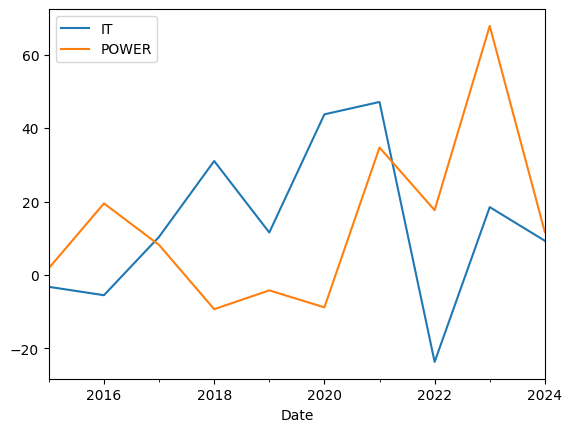

In [130]:
df_yearly_returns[['IT','POWER']].plot()

In [131]:
df_yearly_returns

,NIFTY50,METALS & MINING,SERVICES,HEALTHCARE,CONSUMER DURABLES,FINANCIAL SERVICES,AUTOMOBILE & AUTO COMPONENTS,TELECOM,OIL & GAS,FMCG,CONSTRUCTION MATERIALS,IT,CONSTRUCTION,POWER,CHEMICALS
Date,,,,,,,,,,,,,,,
2015-12-31,-4.06,-31.14,-18.23,7.61,8.53,11.81,9.38,-3.49,1.47,21.29,5.05,-3.23,-14.67,1.85,26.42
2016-12-31,3.01,53.70,2.89,-13.57,-1.04,14.05,13.37,-10.21,12.59,-1.74,16.54,-5.51,5.77,19.49,47.68
2017-12-31,28.65,77.37,51.11,-5.24,65.59,81.20,47.93,73.29,28.95,57.27,39.99,10.39,39.90,8.19,17.88
2018-12-31,3.15,6.01,-4.42,6.96,14.25,16.28,-21.28,-41.00,-2.17,28.60,-12.19,31.04,14.25,-9.32,-0.58
2019-12-31,12.02,-0.58,-5.60,12.14,29.03,35.74,-3.72,58.86,24.60,6.78,-0.55,11.57,-9.69,-4.19,15.63
2020-12-31,14.90,57.96,32.17,81.99,45.70,5.20,10.49,11.83,10.20,23.20,29.78,43.75,-0.82,-8.82,-20.21
2021-12-31,24.12,151.96,50.97,27.32,36.33,22.05,-3.34,36.68,17.10,3.35,48.20,47.12,47.24,34.71,60.20
2022-12-31,4.33,76.57,12.02,-13.32,-3.72,3.20,15.05,17.89,6.77,11.57,-5.77,-23.68,10.02,17.65,-4.14
2023-12-31,20.03,-13.98,25.21,26.09,24.49,11.83,42.20,28.05,18.45,22.98,45.57,18.48,69.05,67.83,-18.00


In [132]:
melted_df = df_yearly_returns.reset_index().melt(id_vars=['Date'], var_name='Sectors', value_name='Index_Value')
melted_df['Date'] = melted_df['Date'].dt.strftime('%Y')


In [133]:
melted_df

,Date,Sectors,Index_Value
0,2015,NIFTY50,-4.06
1,2016,NIFTY50,3.01
2,2017,NIFTY50,28.65
3,2018,NIFTY50,3.15
4,2019,NIFTY50,12.02
...,...,...,...
145,2020,CHEMICALS,-20.21
146,2021,CHEMICALS,60.20
147,2022,CHEMICALS,-4.14
148,2023,CHEMICALS,-18.00


In [136]:
# Create the scatter plot using Plotly Express
fig = px.scatter(melted_df, x='Sectors', y='Index_Value', text='Index_Value', labels={'Sectors': 'Sectors', 'Index_Value': 'Value in %'},
                 title='Scatter Plot of Value by Sector (Year: 2010-2023)', height=800,
                 animation_frame= 'Date',animation_group='Sectors')



fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, {'frame': {'duration': 2500, 'redraw': True},
                                                               'fromcurrent': True,
                                                               'mode': 'immediate'}]),
                                            dict(label='Pause',
                                                 method='animate',
                                                 args=[[None], {'frame': {'duration': 5, 'redraw': False},
                                                                'mode': 'immediate'}])])])

# # Adjust the position of the text values
# fig.update_traces(textposition='top center')
fig.update_traces(textposition='middle left', textfont_size = 15)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed